In [1]:
from time import perf_counter
start=perf_counter()
import pandas as pd 
print("pandas: ",perf_counter()-start)
start=perf_counter()
import matplotlib.pyplot as plt
print("matplotlib: ",perf_counter()-start)
start=perf_counter()
import csv
print("csv: ",perf_counter()-start)
start=perf_counter()
from sklearn.cluster import DBSCAN
print("DBSCAN: ",perf_counter()-start)
start=perf_counter()
from sklearn.preprocessing import StandardScaler
print("StandardScaler: ",perf_counter()-start)
start=perf_counter()
import mplstereonet
print("mplstereonet: ",perf_counter()-start)

pandas:  4.246864099999996
matplotlib:  1.8045088000000078
csv:  4.0999999995960934e-05
DBSCAN:  8.388081500000013
StandardScaler:  9.710000000495711e-05
mplstereonet:  0.0737365999999895


test test

In [2]:
couleurs_str = {
    '-1': 'gray',
    '0': 'red',  # Rouge
    '1': 'blue',  # Bleu
    '2': 'green',  # Vert
    '3': 'orange',  # Orange
    '4': 'purple',  # Violet
    '5': 'cyan',  # Cyan
    '6': 'magenta',  # Magenta
    '7': 'yellow',  # Jaune
    '8': 'black',  # Noir
}

couleurs = {int(k): v for k, v in couleurs_str.items()}


Moyenne des azimuts (Toute orientation confondu) : 136.82625217391305
Écart type des azimuts (Toute orientation confondu) : 14.20195289340196
Valeur maximale des azimuts (Toute orientation confondu) : 165.297
Valeur minimale des azimuts (Toute orientation confondu) : 114.65299999999999

Moyenne des azimuts (90°-180°) : 136.21829166666666
Écart type des azimuts (90°-180°) : 13.491308968882173
Valeur maximale des azimuts (90°-180°) : 165.297
Valeur minimale des azimuts (90°-180°) : 114.65299999999999

Moyenne des azimuts (270°-360°) : 317.48948181818184
Écart type des azimuts (270°-360°) : 15.542704346708057
Valeur maximale des azimuts (270°-360°) : 343.9552
Valeur minimale des azimuts (270°-360°) : 295.0



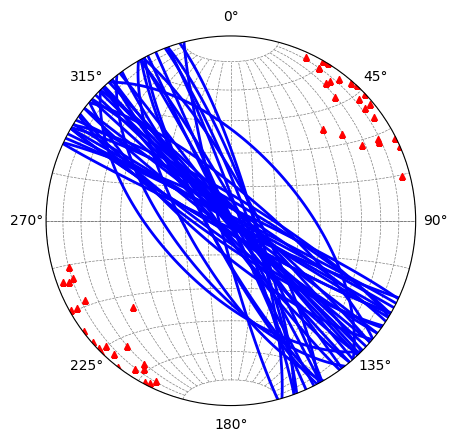

In [17]:
# Ouvrir le fichier CSV en mode lecture
with open('Plans_18_02.csv', newline='') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv, delimiter=';')
    # Ignorer l'en-tête s'il existe
    next(lecteur_csv)
    # Parcourir les lignes et afficher la valeur de la n-ieme colonne (par exemple, la 3e colonne)
    azimut = []
    azimut_90_180 = []
    pendage = []
    for ligne in lecteur_csv:
        dip_orientation = float(ligne[10])
        dip = float(ligne[9])
        if dip_orientation <= 90:
            orientation = 270 + dip_orientation
        else:
            orientation = dip_orientation - 90
        azimut.append(orientation)
        pendage.append(dip)
        if orientation <= 180:
            azimut_90_180.append(orientation)
        if orientation > 180: 
            azimut_90_180.append(orientation - 180)

# Séparer le DataFrame en deux blocs
df_90_180 = df[(df['azimut'] >= 90) & (df['azimut'] <= 180)]
df_270_360 = df[(df['azimut'] >=270) & (df['azimut'] <= 360)]

# Calculs pour le bloc concaténé de tous les azimuts remis entre 90 et 180 (donc celui où la direction de pendage n'importe pas mais juste l'azimut)
moyenne_azimut_tot = np.mean(azimut_90_180)
ecart_type_azimut_tot = np.std(azimut_90_180)
max_azimut_tot = np.max(azimut_90_180)
min_azimut_tot = np.min(azimut_90_180)

print(f"Moyenne des azimuts (Toute orientation confondu) : {moyenne_azimut_tot}")
print(f"Écart type des azimuts (Toute orientation confondu) : {ecart_type_azimut_tot}")
print(f"Valeur maximale des azimuts (Toute orientation confondu) : {max_azimut_tot}")
print(f"Valeur minimale des azimuts (Toute orientation confondu) : {min_azimut_tot}")
print()

# Calculs pour le bloc 90°-180°
moyenne_azimut_90_180 = df_90_180['azimut'].mean()
ecart_type_azimut_90_180 = df_90_180['azimut'].std()
max_azimut_90_180 = df_90_180['azimut'].max()
min_azimut_90_180 = df_90_180['azimut'].min()

print(f"Moyenne des azimuts (90°-180°) : {moyenne_azimut_90_180}")
print(f"Écart type des azimuts (90°-180°) : {ecart_type_azimut_90_180}")
print(f"Valeur maximale des azimuts (90°-180°) : {max_azimut_90_180}")
print(f"Valeur minimale des azimuts (90°-180°) : {min_azimut_90_180}")
print()
   
# Calculs pour le bloc 270°-360°
moyenne_azimut_270_360 = df_270_360['azimut'].mean()
ecart_type_azimut_270_360 = df_270_360['azimut'].std()
max_azimut_270_360 = df_270_360['azimut'].max()
min_azimut_270_360 = df_270_360['azimut'].min()

print(f"Moyenne des azimuts (270°-360°) : {moyenne_azimut_270_360}")
print(f"Écart type des azimuts (270°-360°) : {ecart_type_azimut_270_360}")
print(f"Valeur maximale des azimuts (270°-360°) : {max_azimut_270_360}")
print(f"Valeur minimale des azimuts (270°-360°) : {min_azimut_270_360}")
print()

data = {
    'azimut': azimut,
    'pendage': pendage
}
df = pd.DataFrame(data)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['azimut', 'pendage']])

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

# Plot all data points without clustering
ax.plane(azimut, pendage, color='blue', linewidth=2)
ax.pole(azimut, pendage, '^', color='red', markersize=4)

ax.set_longitude_grid(10)
ax.set_longitude_grid_ends(75)
ax.grid(which='both', linestyle='dashed', color='gray', linewidth=0.5)

plt.show()

      azimut  pendage  famille
0   141.9050  65.1116       -1
1   309.8110  77.0673        0
2   343.9552  80.2504        0
3   125.2990  81.7882        1
4   143.8840  85.0000        1
5   301.2797  80.0000        0
6   316.0000  89.0000        0
7   311.2250  85.4544        0
8   130.0000  76.7137        1
9   121.5420  90.0000        1
10  136.3230  85.0000        1
11  302.9941  85.0000        0
12  150.9320  80.0000        1
13  127.5060  85.9479        1
14  340.0170  80.0000        0
15  124.6230  80.0000        1
16  314.5562  90.0000        0
17  330.4553  85.1060        0
18  140.0000  87.9997        1
19  150.0000  71.0005       -1
20  318.5778  60.0000       -1
21  152.1710  80.0000        1
22  140.0000  84.0000        1
23  153.2960  89.0000        1
24  315.0000  85.0000        0
25  340.0000  86.0000        0
26  300.2672  82.1864        0
27  135.1310  60.0000       -1
28  323.0517  89.0322        0
29  120.0000  85.0000        1
30  120.0000  85.0000        1
31  156.

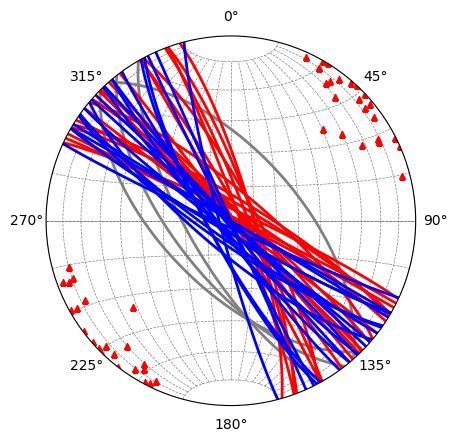

In [5]:

# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=2)
# Eps (epsilon) : Distance maximale entre deux points pour qu'ils soient considérés comme dans le même voisinage.
# Min_samples : Nombre minimal de points requis pour former un cluster.
labels = db.fit_predict(data_scaled)

# Ajout des labels de cluster au DataFrame
df['famille'] = labels

print(df)

df_azimuts_par_famille = df.groupby('famille')['azimut'].apply(list).reset_index()
print(df_azimuts_par_famille)

familles_uniques = df['famille'].unique()

# Boucle pour afficher les azimuts selon chaque famille

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

for famille in familles_uniques:
    azimuts = df[df['famille'] == famille]['azimut'].tolist()
    print(df[df['famille'] == famille]['azimut'].tolist())
    strikes = df[df['famille'] == famille]['azimut'].tolist()
    dips = df[df['famille'] == famille]['pendage'].tolist()
    ax.plane(strikes, dips, color=f"{couleurs[famille]}", linewidth=2)
    ax.pole(strikes, dips, '^', color='red', markersize=4)
ax.set_longitude_grid(10)
ax.set_longitude_grid_ends(75)
ax.grid(which='both', linestyle='dashed', color='gray',
        linewidth=0.5)  # '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

#fig.tight_layout()
plt.show()

     strikes     dips
0   141.9050  65.1116
1   309.8110  77.0673
2   343.9552  80.2504
3   125.2990  81.7882
4   143.8840  85.0000
5   301.2797  80.0000
6   316.0000  89.0000
7   311.2250  85.4544
8   130.0000  76.7137
9   121.5420  90.0000
10  136.3230  85.0000
11  302.9941  85.0000
12  150.9320  80.0000
13  127.5060  85.9479
14  340.0170  80.0000
15  124.6230  80.0000
16  314.5562  90.0000
17  330.4553  85.1060
18  140.0000  87.9997
19  150.0000  71.0005
20  318.5778  60.0000
21  152.1710  80.0000
22  140.0000  84.0000
23  153.2960  89.0000
24  315.0000  85.0000
25  340.0000  86.0000
26  300.2672  82.1864
27  135.1310  60.0000
28  323.0517  89.0322
29  120.0000  85.0000
30  120.0000  85.0000
31  156.0000  89.9999
32  131.0230  89.0000
33  298.0502  89.0000
34  331.6506  78.9999
35  307.5513  90.0000
36  120.0000  90.0000
37  132.9120  90.0000
38  136.7420  90.0000
39  318.6548  89.0000
40  165.2970  85.0000
41  331.0000  89.0000
42  296.5472  88.1279
43  295.0000  85.0000
44  114.65

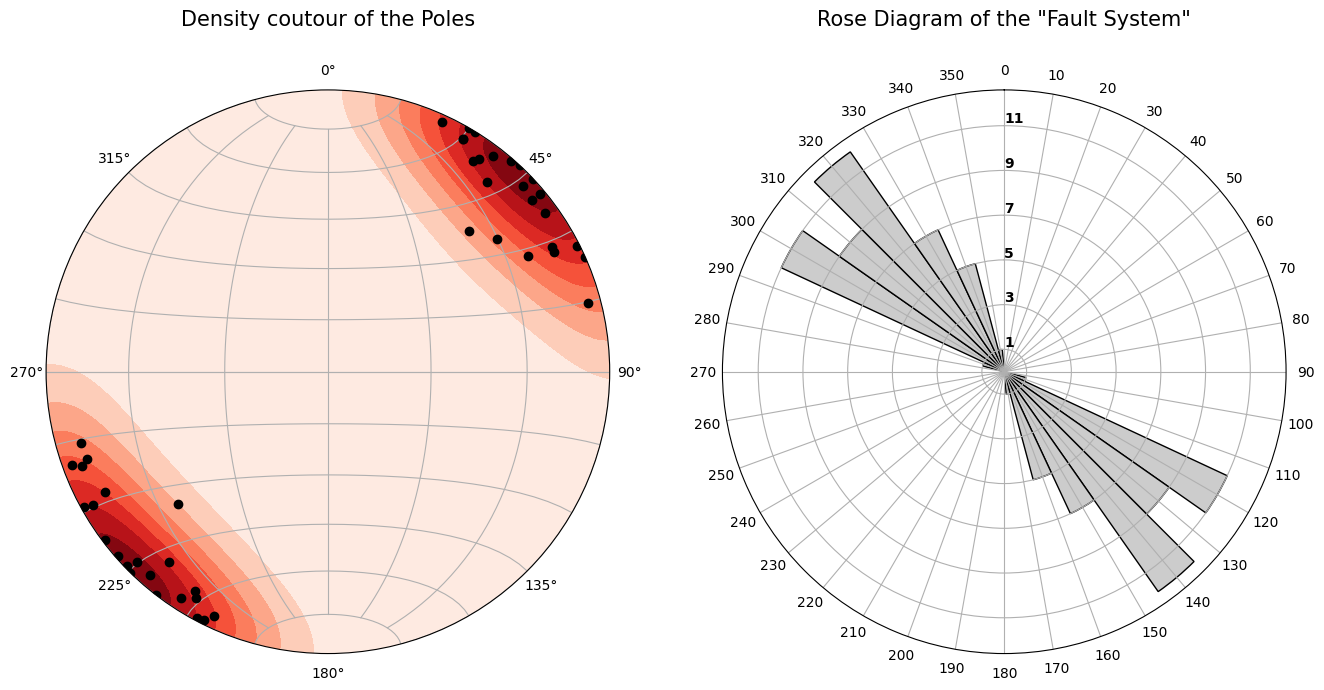

In [6]:
import numpy as np
import matplotlib.pyplot as plt
strikes = df['azimut'].tolist()
dips = df['pendage'].tolist()

%matplotlib inline

# strikes = np.concatenate([np.random.randint(0, 360, 60),
#                           np.random.randint(10, 60, 20),
#                           np.random.randint(190, 300, 20),
#                           np.random.randint(60, 90, 20)])

# dips = np.concatenate([np.random.randint(0, 90, 60),
#                        np.random.randint(60, 90, 60)])

# Convert strikes and dips to a pandas DataFrame
data = {
    'strikes': strikes,
    'dips': dips
}
df_strikes_dips = pd.DataFrame(data)

# Display the DataFrame
print(df_strikes_dips)
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)
number_of_strikes[0] += number_of_strikes[-1]
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

ax = fig.add_subplot(122, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)

plt.show()

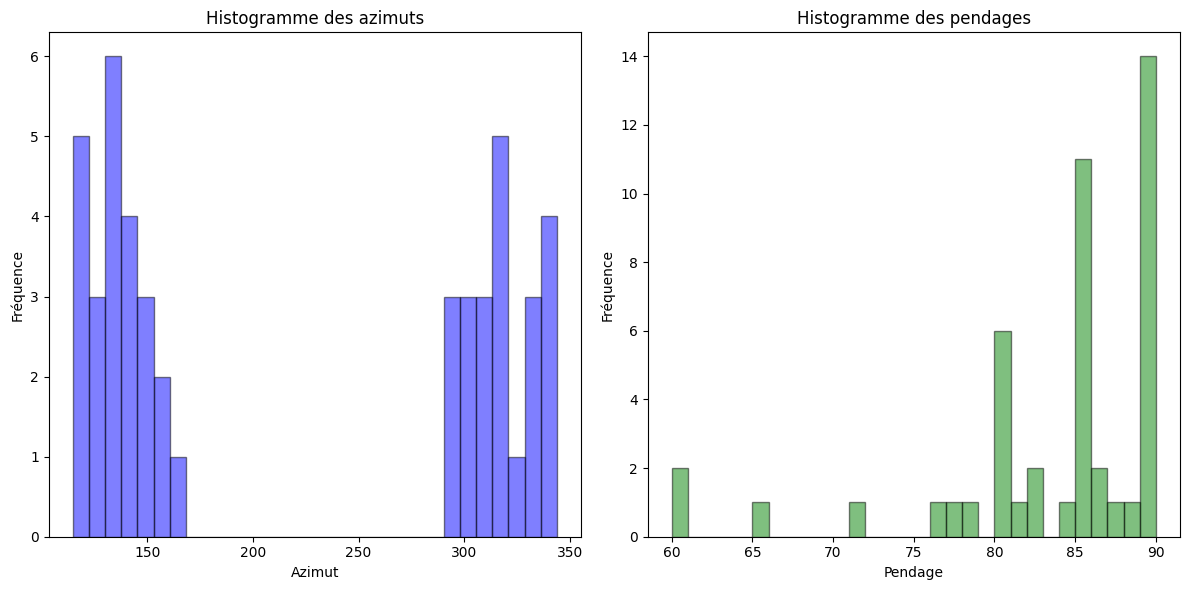

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Utiliser les données existantes pour l'azimut et le pendage
plt.figure(figsize=(12, 6))

# Histogramme pour les azimuts
plt.subplot(1, 2, 1)
plt.hist(azimut, bins=30, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histogramme des azimuts')
plt.xlabel('Azimut')
plt.ylabel('Fréquence')

# Histogramme pour les pendages
plt.subplot(1, 2, 2)
plt.hist(pendage, bins=30, alpha=0.5, color='green', edgecolor='black')
plt.title('Histogramme des pendages')
plt.xlabel('Pendage')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

Code pour passer du .csv (du export planes (E) de cloud compare à un ascii pour gocad), ne montre que les centres des points.

In [7]:
def csv_to_ascii_with_modified_coordinates(csv_file_path, ascii_file_path):
    with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        with open(ascii_file_path, 'w', encoding='ascii', errors='ignore') as ascii_file:
            next(csv_reader)  # Skip header
            ascii_file.write(f"NAME;X;Y;Z;\n")
            for row in csv_reader:
                x = float(row[2]) + 526900
                y = float(row[3]) + 6484890
                z = float(row[4])
                ascii_file.write(f"PLANE_BIS;{x};{y};{z};\n")

# Example usage
csv_to_ascii_with_modified_coordinates('Plans_test.csv', 'vertices_output_modified.txt')

Code pour passer de l'autre csv export à ascii, transforme le plan pour l'orienter selon la normale données.

In [20]:
import numpy as np

def calculate_vertices_with_normal(x, y, z, width, length, normal):
    x += 526900
    y += 6484890
    half_width = width / 2
    half_length = length / 2

    # Calculate the rotation matrix to align with the normal direction
    normal = np.array(normal)
    normal = normal / np.linalg.norm(normal)
    z_axis = np.array([0, 0, 1])
    v = np.cross(z_axis, normal)
    c = np.dot(z_axis, normal)
    k = 1 / (1 + c)
    rotation_matrix = np.array([
        [v[0] * v[0] * k + c, v[0] * v[1] * k - v[2], v[0] * v[2] * k + v[1]],
        [v[1] * v[0] * k + v[2], v[1] * v[1] * k + c, v[1] * v[2] * k - v[0]],
        [v[2] * v[0] * k - v[1], v[2] * v[1] * k + v[0], v[2] * v[2] * k + c]
    ])

    # Define the vertices in the local plane coordinates
    local_vertices = np.array([
        [-half_width, -half_length, 0],
        [half_width, -half_length, 0],
        [half_width, half_length, 0],
        [-half_width, half_length, 0]
    ])

    # Rotate the vertices to align with the normal direction
    rotated_vertices = np.dot(local_vertices, rotation_matrix.T)

    # Translate the vertices to the given (x, y, z) position
    vertices = rotated_vertices + np.array([x, y, z])
    vertices = [f"{vertex[0]};{vertex[1]};{vertex[2]}" for vertex in vertices]
    return vertices

def csv_to_ascii_with_vertices_and_normal(csv_file_path, ascii_file_path):
    with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        with open(ascii_file_path, 'w', encoding='ascii', errors='ignore') as ascii_file:
            next(csv_reader)  # Skip header
            ascii_file.write(f"NAME;X;Y;Z;FAMILLE;\n")
            for row in csv_reader:
                x = float(row[3])
                y = float(row[4])
                z = float(row[5])
                width = float(row[1])
                length = float(row[2])
                normal = [float(row[6]), float(row[7]), float(row[8])]  # Assuming normal direction is in columns 6, 7, 8
                vertices = calculate_vertices_with_normal(x, y, z, width, length, normal)
                for vertex in vertices:
                    famille = 1 if 90 <= orientation <= 180 else 0
                    ascii_file.write(f"PLANE{csv_reader.line_num - 1};{vertex};{famille};\n")

# Example usage
csv_to_ascii_with_vertices_and_normal('Plans_18_02.csv', 'vertices_output_with_normal.txt')

# 📌 Afficher le chemin du fichier généré
import os
file_path = os.path.abspath('vertices_output_with_normal.txt')
print(f"✅ Fichier '{'vertices_output_with_normal.txt'}' créé avec succès !\n📂 Emplacement : {file_path}")

# 📌 Afficher un aperçu du fichier généré
with open('vertices_output_with_normal.txt', "r") as f:
    preview = "".join(f.readlines()[:10])  # Afficher les 10 premières lignes
print("\n--- Aperçu du fichier ---")
print(preview)

✅ Fichier 'vertices_output_with_normal.txt' créé avec succès !
📂 Emplacement : o:\Users\boutin15u\3-Projet_labo_3A\Code_Python\Projet_Lab_Visual\vertices_output_with_normal.txt

--- Aperçu du fichier ---
NAME;X;Y;Z;FAMILLE;
PLANE1;526920.5891568038;6484874.542797771;154.60106652896513;0;
PLANE1;526928.1598596703;6484871.223142822;163.02882401053853;0;
PLANE1;526926.8122431963;6484874.959002229;165.71093347103488;0;
PLANE1;526919.2415403298;6484878.278657178;157.28317598946148;0;
PLANE2;526903.7407441107;6484898.247446907;176.0661180119988;0;
PLANE2;526909.2639126453;6484895.15502877;171.0111624370372;0;
PLANE2;526908.4831158894;6484896.263573092;169.47988198800118;0;
PLANE2;526902.9599473547;6484899.355991229;174.5348375629628;0;
PLANE3;526903.0042777852;6484891.809776123;169.52480636405693;0;

